# Keck SA Hall of Fame

Adapted from a spreadsheet maintained by Marc Kassis.

In [ ]:
# Raw Data
# Start Date,End Date,Description,Duration (days)
raw_data = '''
Start String,End String,Name,Status
Dec-92,Jul-00,Tom Bida,departed
Jan-95,current,Randy Campbell,SA
Jan-95,Jan-98,Wendy Harrison,departed
May-96,May-15,Bob Goodrich,departed
Sep-97,Dec-02,David Sprayberry,departed
Apr-98,Oct-14,Gregory Wirth,departed
Jan-00,Jun-10,Grant Hill,at Keck
Aug-01,Jun-05,Paola Amico,departed
May-03,Jul-16,Hien Tran,departed
Jul-03,Nov-06,Jeff Mader,at Keck
Sep-03,current,Jim Lyke,SA
Oct-03,May-17,Marc Kassis,at Keck
Jun-06,Nov-10,Al Conrad,departed
Nov-08,Jan-16,Scott Dahm,departed
Jun-11,current,Luca Rizzi,SA
Oct-11,current,Greg Doppmann,SA
Dec-15,current,Carlos Alvarez,SA
Apr-16,current,Josh Walawender,SA
Apr-16,current,Percy Gomez,SA
Feb-17,current,Sherry Yeh,SA
Jan-18,Apr-19,Alessandro Rettura,departed
Jan-19,Oct-20,Elena Manjavacas,departed
Mar-21,current,Rosalie McGurk,SA
Mar-21,current,Michael Lundquist,SA
'''

In [2]:
from datetime import datetime
from astropy.table import Table, Column

%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
from matplotlib import pyplot as plt

In [3]:
SAs = Table.read(raw_data, format='ascii.csv')
start_date = [datetime.strptime(SA['Start String'], '%b-%y') for SA in SAs]
SAs.add_column(Column(start_date, name='start'))
end_date = [datetime.strptime(SA['End String'], '%b-%y') if SA['Status'] != 'SA' else datetime.now() for SA in SAs]
SAs.add_column(Column(end_date, name='end'))
duration = [(SA['end']-SA['start']).days for SA in SAs]
SAs.add_column(Column(duration, name='duration'))
first_start = min(SAs['start'])
start_offset = [(SA['start']-first_start).days for SA in SAs]
SAs.add_column(Column(start_offset, name='start_offset'))

In [4]:
print('Current SAs')
print(SAs[SAs['Status'] == 'SA']['Name', 'Start String', 'End String', 'duration'])

Current SAs
       Name       Start String End String duration
----------------- ------------ ---------- --------
   Randy Campbell       Jan-95    current     9516
         Jim Lyke       Sep-03    current     6351
       Luca Rizzi       Jun-11    current     3521
    Greg Doppmann       Oct-11    current     3399
   Carlos Alvarez       Dec-15    current     1877
  Josh Walawender       Apr-16    current     1755
      Percy Gomez       Apr-16    current     1755
       Sherry Yeh       Feb-17    current     1449
   Rosalie McGurk       Mar-21    current      -40
Michael Lundquist       Mar-21    current      -40


In [5]:
def generate_plot(SAs, title):
    plt.figure(figsize=(18,16))
    plt.title(title)
    plt.barh(SAs['Name'], SAs['duration'], left=SAs['start_offset'],
             color=[{'SA': 'g', 'at Keck': 'y', 'departed': 'r'}[s] for s in SAs['Status']],
             label=SAs['duration'],
             alpha=0.4)
#     for y,SA in enumerate(SAs):
#         x = SA['start_offset'] + SA['duration']/2
#         plt.text(x, y, SA['duration'], ha='center', va='center')
    plt.xlabel('Days')
    plt.grid(axis='y')
    plt.savefig(f'{title}.png')
    plt.show()

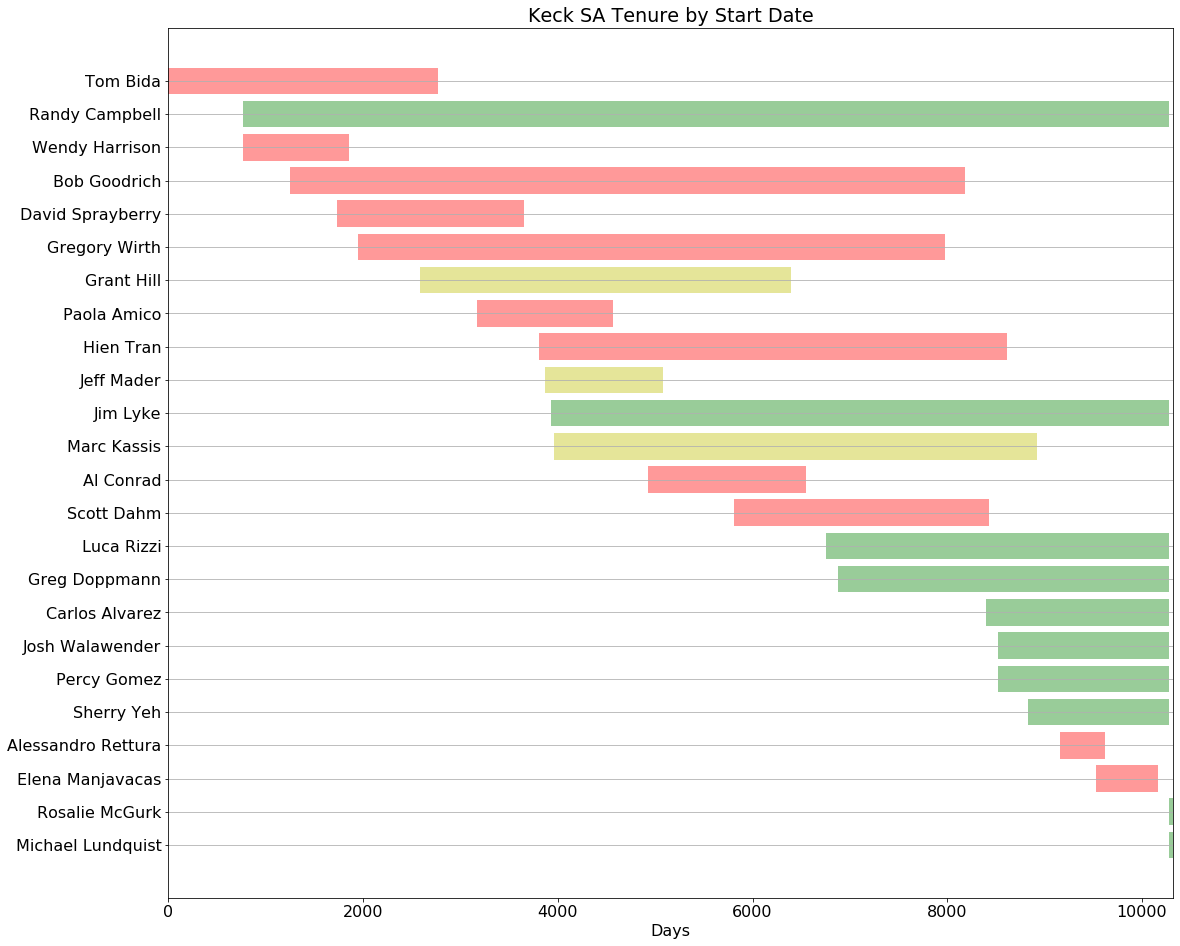

In [6]:
SAs.sort('start', reverse=True)
generate_plot(SAs, 'Keck SA Tenure by Start Date')

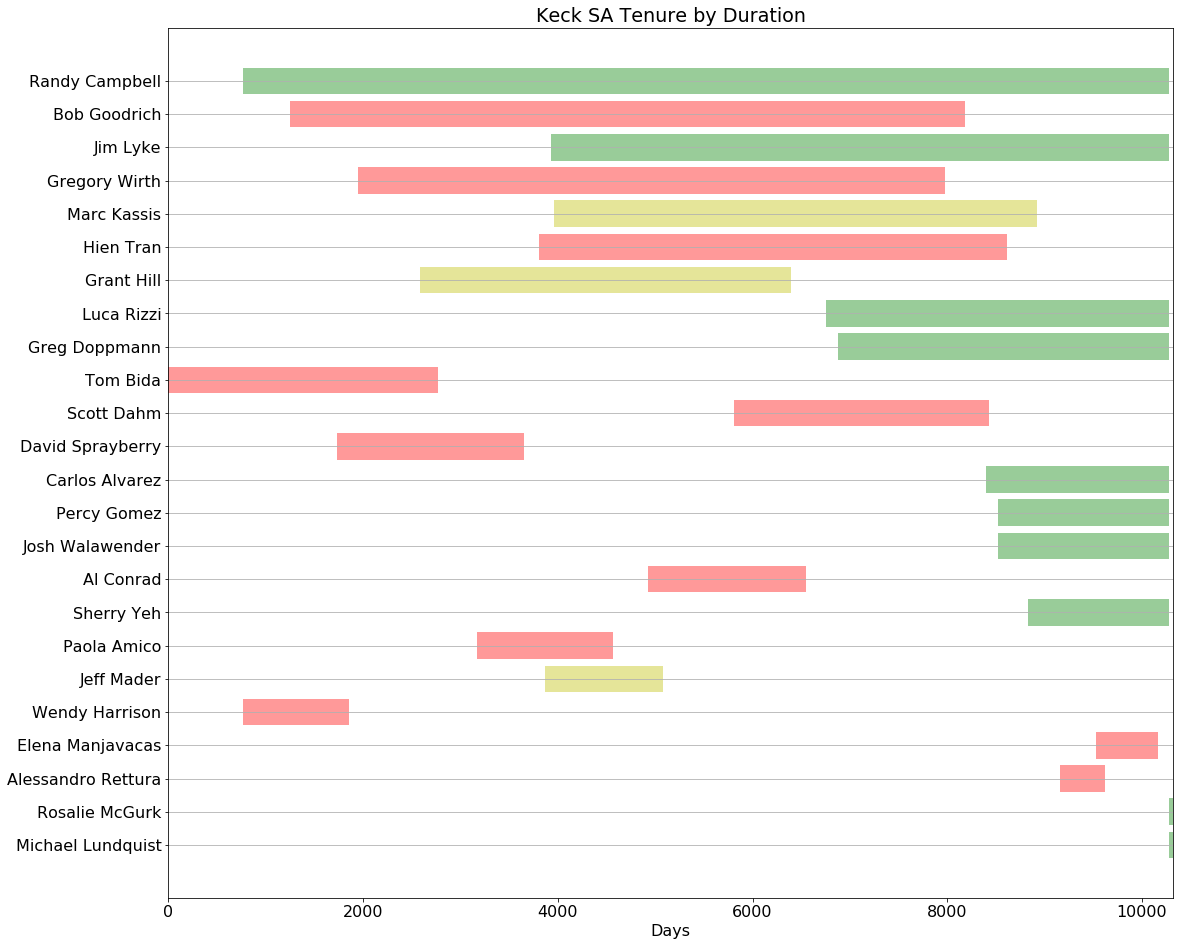

In [7]:
SAs.sort('duration', reverse=False)
generate_plot(SAs, 'Keck SA Tenure by Duration')